# Google Data Analytics Certificate Capstone Project:

This is my Capstone Project for the Course of Google Data Analytics Specialization.
In this capstone I had to find the differences about the casual riders and the members from Cyclistic a fictional bike sharing company.

## Ask Phase:
I was assigned to answer the question: How do annual members and casual riders use Cyclistic differently?
The data I'll use is data from Cyclistic. This is a fictional company created for this capstone. The data was made available under this [license](https://ride.divvybikes.com/data-license-agreement)

## Prepare Phase:
I'm using this [dataset](https://www.kaggle.com/datasets/fernandomartinezt/google-casestudy-1-2022-2023) that has all the data of Cyclistic from 2022.
To verify data's integrity I checked if if the columns matched and if there were some blank cells or errors.

First I initialized the libraries I'll use for this project

In [1]:
library("ggplot2")
library("tidyverse")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




I red every .csv I needed and checked the integrity using the str() function. Then i joined all of them in one.
After this I removed the data that won't help me answer the question and cleaned the memory so the program would run smoothly.

In [2]:
m1<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202201-divvy-tripdata.csv")
m2<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv")
m3<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv")
m4<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv")
m5<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv")
m6<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv")
m7<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv")
m8<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv")
m9<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv")
m10<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv")
m11<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv")
m12<- read.csv("/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv")

str(m1)
str(m2)
str(m3)
str(m4)
str(m5)
str(m6)
str(m7)
str(m8)
str(m9)
str(m10)
str(m11)
str(m12)

y2022 <- bind_rows(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)

rm(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)

y2022 <- y2022 %>%
    select(-c(start_lat, start_lng, end_lat, end_lng))

'data.frame':	103770 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num

With this data i can solve my problem by comparing the diferences between the casual riders and the members of Cyclistic.

## Process Phase: 

In this phase I'll use R to clean the data and get it ready to analyze.

Now I'm separating the dates into different columns to work better with them and create a ride_length column to see the difference beetween the members and the casual rides

In [3]:
y2022$date <- as.Date(y2022$started_at)
y2022$month <- format(as.Date(y2022$date), "%m")
y2022$day <- format(as.Date(y2022$date), "%d")
y2022$year <- format(as.Date(y2022$date), "%Y")
y2022$day_of_week <- format(as.Date(y2022$date), "%A")
y2022$ride_length <- difftime(y2022$ended_at,y2022$started_at)

I review the data to make sure everything is correct

In [4]:
View(y2022)
str(y2022)
summary(y2022)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,month,day,year,day_of_week,ride_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,2022-01-13,01,13,2022,Thursday,177 secs
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,2022-01-10,01,10,2022,Monday,261 secs
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,2022-01-25,01,25,2022,Tuesday,261 secs
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,2022-01-04,01,04,2022,Tuesday,896 secs
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,2022-01-20,01,20,2022,Thursday,362 secs
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,member,2022-01-11,01,11,2022,Tuesday,202 secs
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,member,2022-01-30,01,30,2022,Sunday,994 secs
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,member,2022-01-22,01,22,2022,Saturday,724 secs
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,member,2022-01-17,01,17,2022,Monday,1527 secs


'data.frame':	5667717 obs. of  15 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ member_casual     : chr  "casual" "casual" "member" "casual" ...
 $ date 

   ride_id          rideable_type       started_at          ended_at        
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

## Analyze Phase:
Now it's time to start analyzing.

First I check if ride_lenght is numeric so i can work with it and because it's not a make it numeric

In [5]:
is.numeric(y2022$ride_length)
y2022$ride_length <- as.numeric(as.character(y2022$ride_length))
is.numeric(y2022$ride_length)

[1] FALSE

[1] TRUE

I clean some data that isn't about member's/ casual's trips.
And I checked a summary of the data and aggregated some important data for this capstone.

In [6]:
summary(y2022$ride_length)
aggregate(y2022$ride_length ~ y2022$member_casual, FUN = mean)
aggregate(y2022$ride_length ~ y2022$member_casual, FUN = median)
aggregate(y2022$ride_length ~ y2022$member_casual, FUN = max)
aggregate(y2022$ride_length ~ y2022$member_casual, FUN = min)
aggregate(y2022$ride_length ~ y2022$member_casual + y2022$day_of_week, FUN = mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-621201     349     617    1167    1108 2483235 

y2022$member_casual,y2022$ride_length
<chr>,<dbl>
casual,1748.6577
member,762.6251


y2022$member_casual,y2022$ride_length
<chr>,<dbl>
casual,780
member,530


y2022$member_casual,y2022$ride_length
<chr>,<dbl>
casual,2483235
member,93594


y2022$member_casual,y2022$ride_length
<chr>,<dbl>
casual,-8245
member,-621201


y2022$member_casual,y2022$day_of_week,y2022$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1682.6395
member,Friday,751.8412
casual,Monday,1751.2163
member,Monday,736.1996
casual,Saturday,1956.8227
member,Saturday,848.3884
casual,Sunday,2043.2066
member,Sunday,841.7481
casual,Thursday,1532.8592


I ordered the days of the week so it's easier to visualize.

In [7]:
y2022$day_of_week <- ordered(y2022$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(y2022$ride_length ~ y2022$member_casual + y2022$day_of_week, FUN = mean)

y2022$member_casual,y2022$day_of_week,y2022$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2043.2066
member,Sunday,841.7481
casual,Monday,1751.2163
member,Monday,736.1996
casual,Tuesday,1549.1046
member,Tuesday,727.7246
casual,Wednesday,1485.0507
member,Wednesday,725.1048
casual,Thursday,1532.8592


## Share Phase: 

Now it's time to start visualizing the data of the first part.

This is a visualization for the number of rides by rider type.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


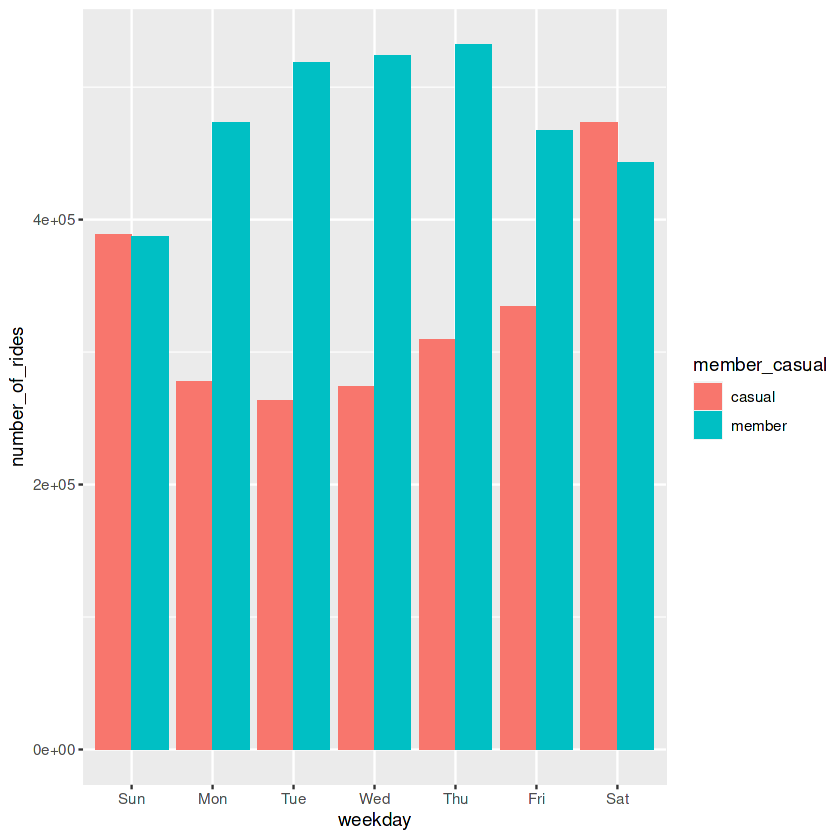

In [8]:
y2022 %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>%
        group_by(member_casual, weekday) %>%
            summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
                arrange(member_casual, weekday)  %>%
                    ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
                    geom_col(position = "dodge")

And this is for the average duration

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


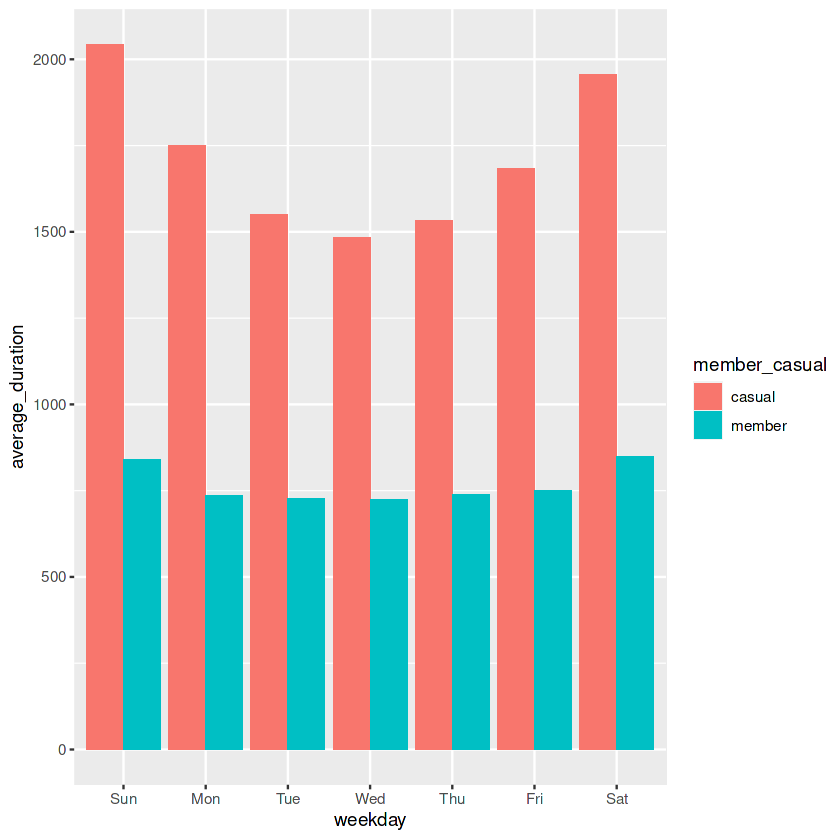

In [9]:
y2022 %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>%
        group_by(member_casual, weekday) %>%
            summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
                arrange(member_casual, weekday)  %>%
                    ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
                    geom_col(position = "dodge")

After viewing the graphs it's easy to find some trends in the data.
We can see members ride more times each day but the average duration is less.
This gives us an idea of what we can do to make more casual people become members.

In [10]:
counts <- aggregate(y2022$ride_length ~ y2022$member_casual + y2022$day_of_week, FUN = mean)
View(counts)
write.csv(counts,"counts.csv")

y2022$member_casual,y2022$day_of_week,y2022$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2043.2066
member,Sunday,841.7481
casual,Monday,1751.2163
member,Monday,736.1996
casual,Tuesday,1549.1046
member,Tuesday,727.7246
casual,Wednesday,1485.0507
member,Wednesday,725.1048
casual,Thursday,1532.8592


### Conclusion:
As we saw in the graphs casual riders use Cyclistic in specific times of the year.
The members use it more regularly for shorter trips but casual users have long time trips once in a while.

#### Idea:
I'd recommend Cyclistic to make a membership for people that don't want to use the bikes regularly. Like a membership for the times a month you'll use the bike or the time you'll use it.

To end this project I'll link a presentation I prepared for this capstone [here](https://docs.google.com/presentation/d/16K2SSbp8t2CQKpR3XLP2AjaIc76IoRN2/edit?usp=sharing&ouid=106345296587363198136&rtpof=true&sd=true).